# Unstructured Meshes

The popular finite volumes and finite elements methods can operate on unstructured meshes, i.e. grids whose cells can have arbitrary numbers of faces.
Since version 2.5, Φ<sub>Flow</sub> supports unstructured meshes via the `geom.UnstructuredMesh` class.
Tensor operations for unstructured meshes are executed using sparse matrices and are fully GPU-supported.

In [1]:
# !pip install --upgrade --quiet git+https://github.com/tum-pbs/PhiFlow@2.5-develop
from phi.flow import *

## Loading an Unstructured Mesh

SU2 files can be read into Φ<sub>Flow</sub> via `geom.load_su2()`. This requires the package `ezmesh` to be installed.
Here we can also specify what sparse format should be used to represent quantities sampled on the face centers.
The default, `csc` allows for efficient boundary condition handling but you may also use `coo` or `csr´.

In [2]:
# !pip install ezmesh

In [3]:
mesh = geom.load_su2("mesh_wedge_inv.su2", face_format='csc')

We can use `plot()` and `show()` from `phi.vis´ to visualize the mesh.

C:\PhD\phiflow2\phi\math\_tensors.py:408: SyntaxWarning: Indexing without item names is not recommended. Got indices (cellsⁱ=300, vertex_indexˢ=4)
  return gather(self, item)


<Figure size 864x360 with 1 Axes>

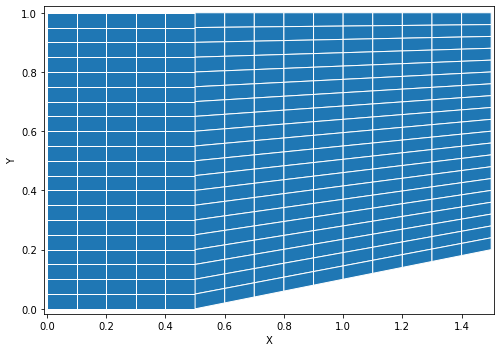

In [4]:
plot(mesh)

## Defining Fields on Meshes

Let's define physical quantity on our mesh!
We can do this by creating a `Field` instance, passing our mesh, the values and the boundary conditions.
Let's start with all centroids having value 1 while the boundary faces get value 0.

<Figure size 864x360 with 1 Axes>

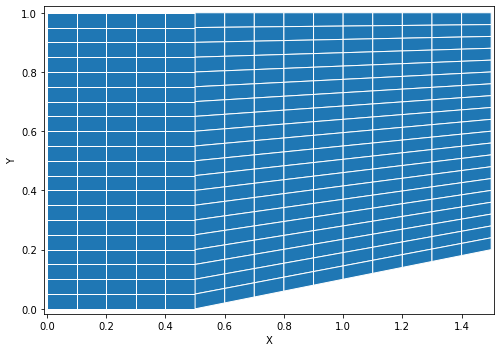

In [5]:
F = Field(mesh, values=1, extrapolation=0)
plot(F)

Since the boundary is not plotted, this is not very interesting.
Next, let's see the boundary influence by interpolating the values first to the face centers and then back to the centroids.

<Figure size 864x360 with 2 Axes>

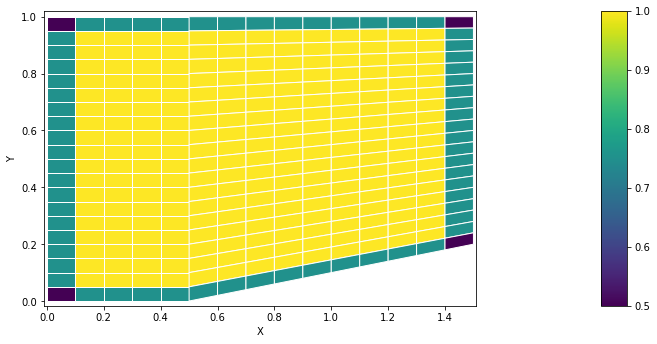

In [6]:
plot(F.at_faces(scheme='linear').at_centers())

Let's do this again, but with different boundary conditions.
The SU2 file we loaded defines four boundaries: inlet, outlet, upper, lower.
We can define a boundary condition for each of these, choosing from constant values or zero gradient conditions.

<Figure size 864x360 with 1 Axes>

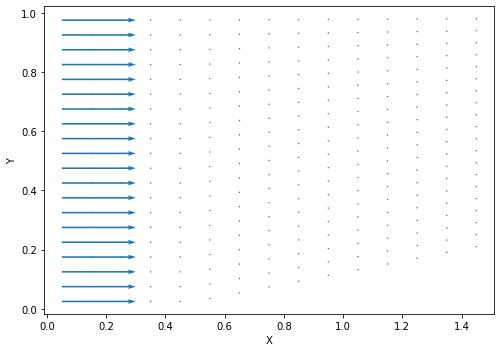

In [7]:
boundaries = {'inlet': vec(x=1, y=0), 'upper': ZERO_GRADIENT, 'lower': ZERO_GRADIENT, 'outlet': 0}
F = Field(mesh, values=vec(x=0, y=0), boundary=boundaries)
plot(F.at_faces(scheme='linear').at_centers())

We can also sample other geometries.

<Figure size 864x360 with 2 Axes>

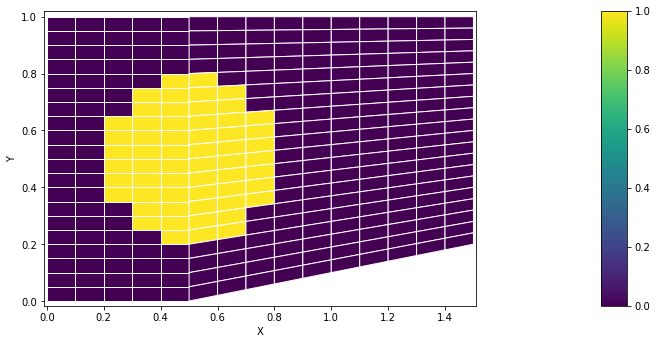

In [8]:
plot(Field(mesh, Sphere(vec(x=.5, y=.5), radius=.3), 0))

Alternatively, we can sample values from a function that is given the center position of each cell.
Let's sample a Gaussian distribution in *x* with $\sigma=0.2$ at the cell centroids.

<Figure size 864x360 with 2 Axes>

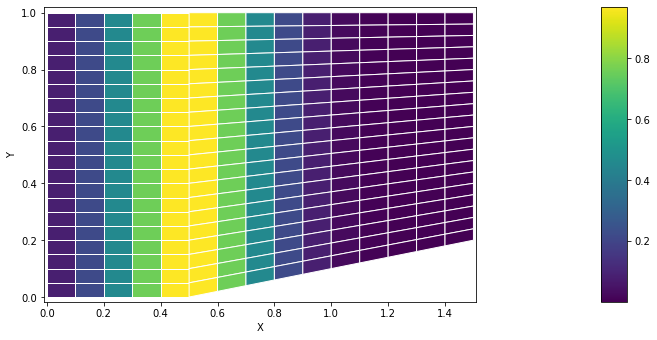

In [9]:
T = Field(mesh, lambda x, y: math.exp(-.5 * (x-.5)**2 / .2**2), 0)
plot(T)

Next, let's resample an existing `Field` defined on a uniform grid to our mesh centers.

C:\PhD\phiflow2\phi\vis\_matplotlib\_matplotlib_plots.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


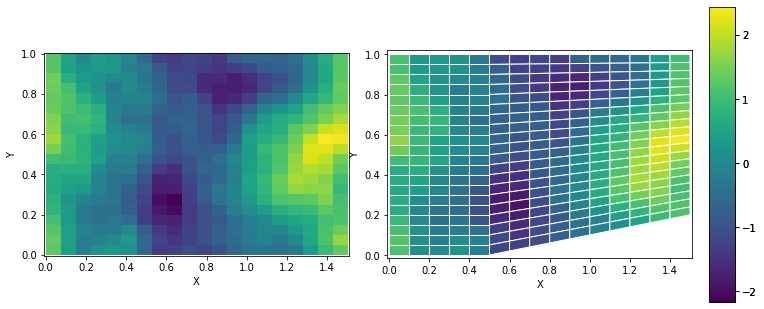

In [10]:
grid = CenteredGrid(Noise(scale=.5), x=20, y=20, bounds=Box(x=(0, 1.5), y=(0, 1)))
plot(grid, Field(mesh, grid, 0))

Finally, let's construct a `Field` from a `Tensor` directly.
This tensor needs to have a dimension that lists the values for each cell in addition to any other dimensions (vector, batch, etc.).
This dimension is an instance dimension, typically called `cells`, and can be obtained from the mesh.

In [11]:
dim = instance(mesh)
dim

(cellsⁱ=300)

With this, we can create tensors for our field.

<Figure size 864x360 with 3 Axes>

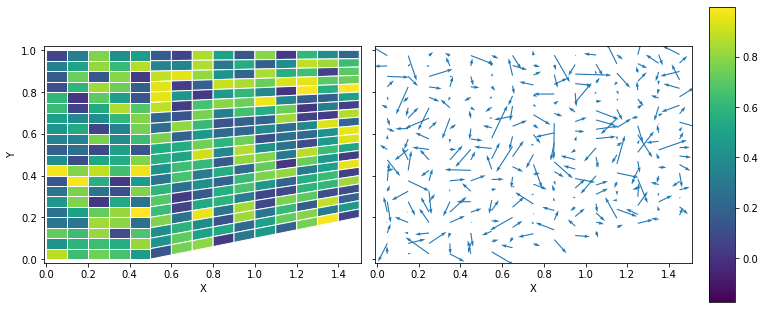

In [14]:
rnd_scalar = Field(mesh, math.random_uniform(dim), 0)
rnd_vector = Field(mesh, vec(x=math.random_normal(dim), y=math.random_normal(dim)), 0)
plot(rnd_scalar, rnd_vector * .05)

## Working with Unstructured Fields



## How it Works

Sparse matrices
Dimensions (instance / dual)

## Further Reading

Running finite volumes simulations